In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fname = '/content/drive/MyDrive/DATASET_ExerciseInPsychiatry.csv'

data = pd.read_csv(fname, sep =';')

In [ ]:
# data_test = pd.read_csv(fname, sep =';')
# data_test.columns = data_test.iloc[0]
# data_test = data_test[1:40+1]

# # replaceing ',' into '.' in the SDS, BMI, VO2MAX columns, as well as the '2' matching columns (including SDS2)
# data_test.SDS.replace(to_replace = ',',value = '.',inplace = True, regex =True)
# data_test.SDS2.replace(to_replace = ',',value = '.',inplace = True, regex =True)
# data_test.BMI.replace(to_replace = ',',value = '.',inplace = True, regex =True)
# data_test.BMI2.replace(to_replace = ',',value = '.',inplace = True, regex =True)
# data_test.VO2MAX.replace(to_replace = ',',value = '.',inplace = True, regex =True)
# data_test.VO2MAX2.replace(to_replace = ',',value = '.',inplace = True, regex =True)

# data_test['r: HADSD2/HADSD'] = data_test['HADSD2'].astype(float)/data_test['HADSD'].astype('float')
# data_test['r: VO2MAX2/VO2MAX'] = data_test['VO2MAX2'].astype(float)/data_test['VO2MAX'].astype('float')
# data_test['VO2MAX']

In [ ]:
data.columns = data.iloc[0]
data = data[1:40+1]

In [ ]:
# replaceing ',' into '.' in the SDS, BMI, VO2MAX columns, as well as the '2' matching columns (including SDS2)
data.SDS.replace(to_replace = ',',value = '.',inplace = True, regex =True)
data.SDS2.replace(to_replace = ',',value = '.',inplace = True, regex =True)
data.BMI.replace(to_replace = ',',value = '.',inplace = True, regex =True)
data.BMI2.replace(to_replace = ',',value = '.',inplace = True, regex =True)
data.VO2MAX.replace(to_replace = ',',value = '.',inplace = True, regex =True)
data.VO2MAX2.replace(to_replace = ',',value = '.',inplace = True, regex =True)

In [ ]:
# ## Another method to convert all the , into . for all the data
# ## and also to convert all the numeric values data type into float
# # Define a conversion function
# def convert_to_float(value):
#   new_value = value.replace(',', '.')
#   try:
#     return float(new_value)
#   except:
#     return new_value

# # # Apply conversion function to each column
# data = data.applymap(convert_to_float)

In [ ]:
data.Group = data.Group.replace('1','control').replace('2','exercise')

In [ ]:
# Creating list of headers to be converted to numeric values
numeric_headers = data.columns.values[3:-1]


In [ ]:
# for loop iterating through headers to apply pd.to_numeric method to all relevant data columns
data.info()
for header in numeric_headers:
  data[header] = pd.to_numeric(data[header],errors = 'coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 1 to 40
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nan                 4 non-null      object 
 1   Group               40 non-null     object 
 2   Participant number  40 non-null     object 
 3   AGE                 40 non-null     object 
 4   HADSA               40 non-null     object 
 5   HADSD               40 non-null     object 
 6   CDI                 40 non-null     object 
 7   HAM-D               40 non-null     object 
 8   STAIA               40 non-null     object 
 9   STAIB               40 non-null     object 
 10  BDI                 40 non-null     object 
 11  SDS                 40 non-null     object 
 12  Weight              40 non-null     object 
 13  BMI                 40 non-null     object 
 14  VO2MAX              40 non-null     object 
 15  HADSA2              40 non-null     object 
 16  HADSD2    

In [ ]:
num_headers_pre = numeric_headers[1:11+1]
num_headers_post = numeric_headers[12:]
pre_post_pairs = list(zip(num_headers_pre,num_headers_post))

for i in range(len(pre_post_pairs)):
  data['r: ' + str(pre_post_pairs[i][1])+'/'+str(pre_post_pairs[i][0])] = data[pre_post_pairs[i][1]]/data[pre_post_pairs[i][0]]

In [ ]:
data.columns

Index([                 nan,              'Group', 'Participant number',
                      'AGE',              'HADSA',              'HADSD',
                      'CDI',              'HAM-D',              'STAIA',
                    'STAIB',                'BDI',                'SDS',
                   'Weight',                'BMI',             'VO2MAX',
                   'HADSA2',             'HADSD2',               'CDI2',
                   'HAM-D2',             'STAIA2',             'STAIB2',
                     'BDI2',               'SDS2',            'Weight2',
                     'BMI2',            'VO2MAX2',                  nan,
          'r: HADSA2/HADSA',    'r: HADSD2/HADSD',        'r: CDI2/CDI',
          'r: HAM-D2/HAM-D',    'r: STAIA2/STAIA',    'r: STAIB2/STAIB',
              'r: BDI2/BDI',        'r: SDS2/SDS',  'r: Weight2/Weight',
              'r: BMI2/BMI',  'r: VO2MAX2/VO2MAX'],
      dtype='object', name=0)

control          Axes(0.1,0.15;0.363636x0.75)
exercise    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

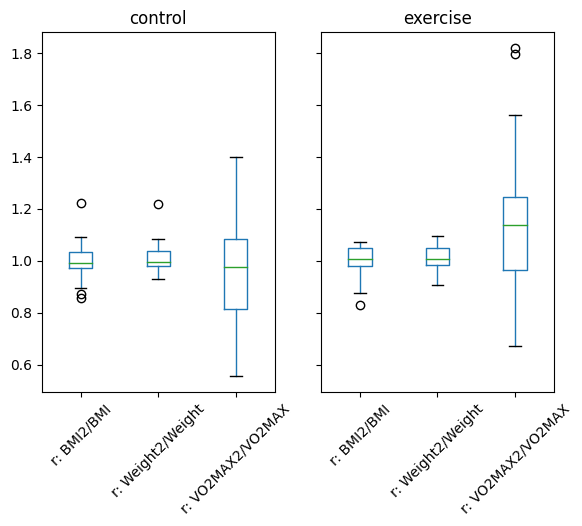

In [ ]:
data.groupby('Group').boxplot(column=['r: BMI2/BMI', 'r: Weight2/Weight', 'r: VO2MAX2/VO2MAX'], rot = 45, grid = False)

In [ ]:
# data.groupby('Group').boxplot(column=['r: HADSA2/HADSA', 'r: HADSD2/HADSD', 'r: CDI2/CDI'], rot = 45)
# data.boxplot(by = 'Group', column=['r: HADSA2/HADSA', 'r: HADSD2/HADSD', 'r: CDI2/CDI'], rot = 45)

In [ ]:
# Comparing results only post-intervention: control vs. exercise groups
# post_assays = data.columns.values[15:23]
# data[data['Group']=='control'].boxplot(column=list(post_assays), rot = 90,grid = False)
# data[data['Group']=='exercise'].boxplot(column=list(post_assays), rot = 90,grid = False)

control          Axes(0.1,0.15;0.363636x0.75)
exercise    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

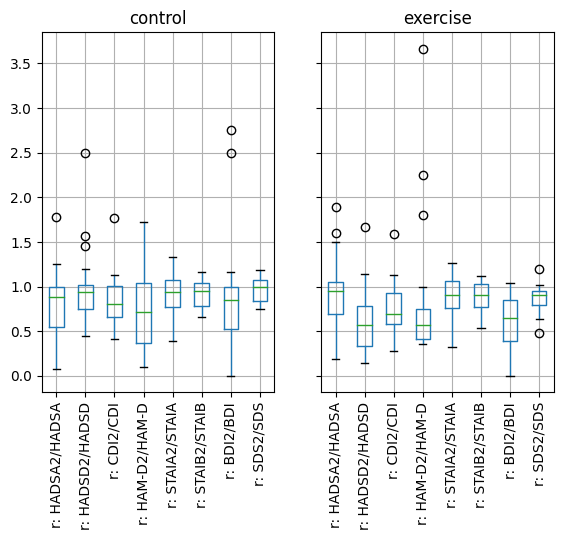

In [ ]:
# Comparing per individual, the ratio of its assays' scores post/pre-intervention:
data.groupby('Group').boxplot(column=list(data.columns.values[27:-3]), rot = 90)

In [ ]:
data.columns
# data.groupby('Group')[str(numeric_headers[1])].plot(kind = 'hist', alpha = 0.4, bins = 5, legend = True)
# # data.groupby('Group')[str(numeric_headers[1])].hist(legend = True, bins = 5, alpha = 0.4)
# # str(numeric_headers[1])+'2'

Index([                 nan,              'Group', 'Participant number',
                      'AGE',              'HADSA',              'HADSD',
                      'CDI',              'HAM-D',              'STAIA',
                    'STAIB',                'BDI',                'SDS',
                   'Weight',                'BMI',             'VO2MAX',
                   'HADSA2',             'HADSD2',               'CDI2',
                   'HAM-D2',             'STAIA2',             'STAIB2',
                     'BDI2',               'SDS2',            'Weight2',
                     'BMI2',            'VO2MAX2',                  nan,
          'r: HADSA2/HADSA',    'r: HADSD2/HADSD',        'r: CDI2/CDI',
          'r: HAM-D2/HAM-D',    'r: STAIA2/STAIA',    'r: STAIB2/STAIB',
              'r: BDI2/BDI',        'r: SDS2/SDS',  'r: Weight2/Weight',
              'r: BMI2/BMI',  'r: VO2MAX2/VO2MAX'],
      dtype='object', name=0)

In [ ]:
# when using ax1.boxplot (see upper example), Series containing 'NaN' values interfere with BoxPlotting;
# To avoid that, here I replaced the NaN with the median, since we calc a ratio here;
data['VO2MAX2'].fillna(data['VO2MAX2'].median()+0.001, inplace = True)
data['r: HADSA2/HADSA'].fillna(data['r: HADSA2/HADSA'].median(), inplace = True)
data['r: VO2MAX2/VO2MAX'].fillna(data['r: VO2MAX2/VO2MAX'].median(), inplace = True)

In [ ]:
# data['r: HADSA2/HADSA'].median()

In [ ]:
data['r: VO2MAX2/VO2MAX'].median()

1.0219371853272596

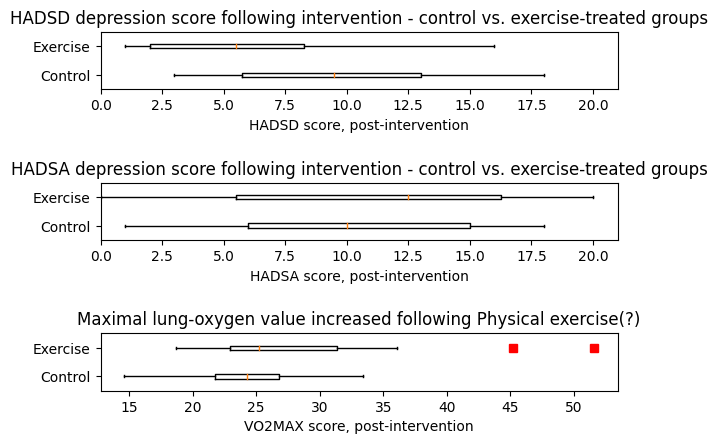

In [ ]:
# Draw multiple boxplots - Unpaired [control vs. exercise] - post-intervention data comparison

fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
ax1.boxplot([data[data['Group']=='control']['HADSD2'],data[data['Group']=='exercise']['HADSD2']],
           labels=['Control', 'Exercise'],
           sym='rs', vert=False, showmeans=False,
           meanline=True, showcaps=True, notch=False)
ax1.set_title('HADSD depression score following intervention - control vs. exercise-treated groups')
ax1.set_xlabel('HADSD score, post-intervention')
# ax1.set_ylabel('y-label')
ax1.set_xlim(0,21)

ax2 = fig.add_subplot(3,1,2)
ax2.boxplot([data[data['Group']=='control']['HADSA2'],data[data['Group']=='exercise']['HADSA2']],
           labels=['Control', 'Exercise'],
           sym='rs', vert=False, showmeans=False,
           meanline=True, showcaps=True, notch=False)
ax2.set_title('HADSA depression score following intervention - control vs. exercise-treated groups')
ax2.set_xlabel('HADSA score, post-intervention')
# ax1.set_ylabel('y-label')
ax2.set_xlim(0,21)

ax3 = fig.add_subplot(3,1,3)
ax3.boxplot([data[data['Group']=='control']['VO2MAX2'],data[data['Group']=='exercise']['VO2MAX2']],
           labels=['Control', 'Exercise'],
           sym='rs', vert=False, showmeans=False,
           meanline=True, showcaps=True, notch=False)
ax3.set_title('Maximal lung-oxygen value increased following Physical exercise(?)')
ax3.set_xlabel('VO2MAX score, post-intervention')
# ax1.set_ylabel('y-label')
#ax3.set_xlim(0.5,1.3)

fig.tight_layout(pad=2)
plt.show()

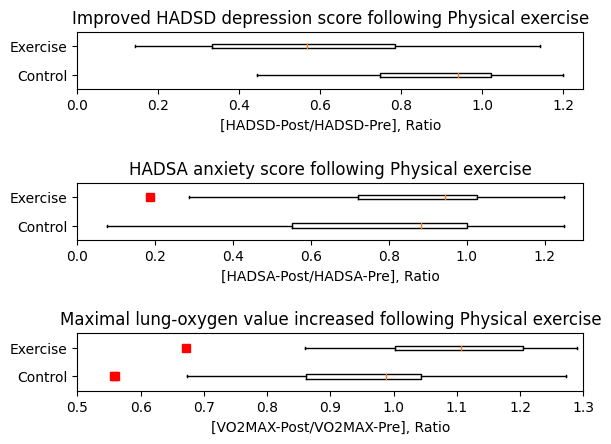

In [ ]:
# Draw multiple boxplots - Matched pre/post-intervention data

fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
ax1.boxplot([data[data['Group']=='control']['r: HADSD2/HADSD'],data[data['Group']=='exercise']['r: HADSD2/HADSD']],
           labels=['Control', 'Exercise'],
           sym='rs', vert=False, showmeans=False,
           meanline=True, showcaps=True, notch=False)
ax1.set_title('Improved HADSD depression score following Physical exercise')
ax1.set_xlabel('[HADSD-Post/HADSD-Pre], Ratio')
# ax1.set_ylabel('y-label')
ax1.set_xlim(0,1.25)

ax2 = fig.add_subplot(3,1,2)
ax2.boxplot([data[data['Group']=='control']['r: HADSA2/HADSA'],data[data['Group']=='exercise']['r: HADSA2/HADSA']],
           labels=['Control', 'Exercise'],
           sym='rs', vert=False, showmeans=False,
           meanline=True, showcaps=True, notch=False)
ax2.set_title('HADSA anxiety score following Physical exercise')
ax2.set_xlabel('[HADSA-Post/HADSA-Pre], Ratio')
# ax1.set_ylabel('y-label')
ax2.set_xlim(0,1.3)

ax3 = fig.add_subplot(3,1,3)
ax3.boxplot([data[data['Group']=='control']['r: VO2MAX2/VO2MAX'],data[data['Group']=='exercise']['r: VO2MAX2/VO2MAX']],
           labels=['Control', 'Exercise'],
           sym='rs', vert=False, showmeans=False,
           meanline=True, showcaps=True, notch=False)
ax3.set_title('Maximal lung-oxygen value increased following Physical exercise')
ax3.set_xlabel('[VO2MAX-Post/VO2MAX-Pre], Ratio')
# ax1.set_ylabel('y-label')
ax3.set_xlim(0.5,1.3)

fig.tight_layout(pad=2)
plt.show()

In [ ]:
# Testing significance between datasets using t-test
import scipy

# Statistical significance test:
# Performed Welch's t-test, which does not assume equal population variance
# This test calculates the T-test for the means of *two independent* samples of scores

HADSD_paired_post_pre_r_ttest = scipy.stats.ttest_ind(data[data['Group']=='control']['r: HADSD2/HADSD'], data[data['Group']=='exercise']['r: HADSD2/HADSD'], equal_var=False, alternative = 'two-sided')
# HADSD_paired_post_pre_r_ttest_greater = scipy.stats.ttest_ind(data[data['Group']=='control']['r: HADSD2/HADSD'], data[data['Group']=='exercise']['r: HADSD2/HADSD'], equal_var=False, alternative = 'greater')

HADSD_unpaired_post_ttest = scipy.stats.ttest_ind(data[data['Group']=='control']['HADSD2'], data[data['Group']=='exercise']['HADSD2'], equal_var=False)

VO2MAX_unpaired_post_ttest = scipy.stats.ttest_ind(data[data['Group']=='control']['VO2MAX2'], data[data['Group']=='exercise']['VO2MAX2'], equal_var=False)

VO2MAX_paired_post_pre_r_ttest = scipy.stats.ttest_ind(data[data['Group']=='control']['r: VO2MAX2/VO2MAX'], data[data['Group']=='exercise']['r: VO2MAX2/VO2MAX'], equal_var=False)

HADSA_paired_post_pre_r_ttest = scipy.stats.ttest_ind(data[data['Group']=='control']['r: HADSA2/HADSA'], data[data['Group']=='exercise']['r: HADSA2/HADSA'], equal_var=False)

HADSA_unpaired_post_ttest = scipy.stats.ttest_ind(data[data['Group']=='control']['HADSA2'], data[data['Group']=='exercise']['HADSA2'], equal_var=False)

Weight_paired_post_pre_r_ttest = scipy.stats.ttest_ind(data[data['Group']=='control']['r: Weight2/Weight'], data[data['Group']=='exercise']['r: Weight2/Weight'], equal_var=False)

BMI_paired_post_pre_r_ttest = scipy.stats.ttest_ind(data[data['Group']=='control']['r: BMI2/BMI'], data[data['Group']=='exercise']['r: BMI2/BMI'], equal_var=False)

In [ ]:
# print(data[data['Group']=='control']['r: HADSD2/HADSD'].mean(), data[data['Group']=='exercise']['r: HADSD2/HADSD'].mean())
# HADSD_paired_post_pre_r_ttest, HADSD_paired_post_pre_r_ttest_greater
# scipy.stats.ttest_ind()


(Ttest_indResult(statistic=2.8162425844606735, pvalue=0.007777444475544144),
 Ttest_indResult(statistic=2.8162425844606735, pvalue=0.003888722237772072))

In [ ]:
HADSD_paired_post_pre_r_ttest

Ttest_indResult(statistic=2.8162425844606735, pvalue=0.007777444475544144)

In [ ]:
HADSD_unpaired_post_ttest

Ttest_indResult(statistic=2.1922598936857973, pvalue=0.03456042490815439)

In [ ]:
print(list(HADSD_paired_post_pre_r_ttest)[1].round(4), list(HADSD_unpaired_post_ttest)[1].round(4))
print(list(VO2MAX_paired_post_pre_r_ttest)[1].round(4), list(VO2MAX_unpaired_post_ttest)[1].round(4))
print(list(Weight_paired_post_pre_r_ttest)[1].round(4))
print(list(BMI_paired_post_pre_r_ttest)[1].round(4))
print(list(HADSA_paired_post_pre_r_ttest)[1].round(4), list(HADSA_unpaired_post_ttest)[1].round(4))

0.0078 0.0346
0.0257 0.0618
0.8264
0.8557
0.3344 0.5243


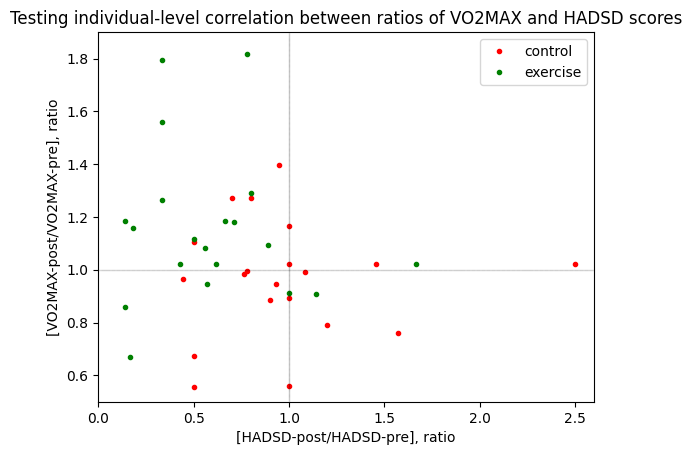

In [ ]:
# Scatter plotting individuals signifcant mental ('r: HADSD2/HADSD') and physiological features ('r: VO2MAX2/VO2MAX')
# Testing for possible interaction

x1 = data[data['Group']=='control']['r: HADSD2/HADSD']
y1 = data[data['Group']=='control']['r: VO2MAX2/VO2MAX']

x2 = data[data['Group']=='exercise']['r: HADSD2/HADSD']
y2 = data[data['Group']=='exercise']['r: VO2MAX2/VO2MAX']

fig = plt.figure()
ax = fig.gca()
ax.plot(x1, y1, '.r', x2, y2, '.g')
# adding the faint-gray-cross for quartiles orientation

x3 = np.linspace(1,1,300)
y3 = np.linspace(0.5,1.9,300)

x4 = np.linspace(0,2.6,300)
y4 = np.linspace(1,1,300)
ax.plot(x3, y3, '|k',x4, y4, '_k', alpha = 0.04)

# ax.plot(x3, y3, '_b')
# ax.plot(x2, y2, '.b', lw=5)
# ax.plot(x3, y3, '.g', lw=5)

ax.set_xlim(0,2.6)
ax.set_ylim(0.5,1.9)

ax.set_title('Testing individual-level correlation between ratios of VO2MAX and HADSD scores')
ax.set_xlabel('[HADSD-post/HADSD-pre], ratio')
ax.set_ylabel('[VO2MAX-post/VO2MAX-pre], ratio')

plt.legend(['control','exercise'])
fig.show()



In [ ]:
# Quantifying 'control' vs. 'exercise' data points per quartile
control_HADSD_VO2MAX_r = list(zip(x1.round(2),y1.round(2)))
exercise_HADSD_VO2MAX_r = list(zip(x2.round(2),y2.round(2)))

# def determine_quartile(lst_of_two_tuple):
#   xlow_ylow,xlow_yhigh,xhigh_yhigh,xhigh_ylow = 0,0,0,0
#   for i in range(len(lst_of_two_tuple)):
#     if lst_of_two_tuple[i][0]<1 and lst_of_two_tuple[i][1]<=1:
#       xlow_ylow+=1
#     if lst_of_two_tuple[i][0]<1 and lst_of_two_tuple[i][1]>1:
#       xlow_yhigh+=1
#     if lst_of_two_tuple[i][0]>=1 and lst_of_two_tuple[i][1]>1:
#       xhigh_yhigh+=1
#     if lst_of_two_tuple[i][0]>=1 and lst_of_two_tuple[i][1]<=1:
#       xhigh_ylow+=1

#   return xlow_ylow,xlow_yhigh,xhigh_yhigh,xhigh_ylow

# redefined the 'detremine_quartile' function to be used for any scatter plot assuming x,y assay cutoff values are given

def determine_quartile(lst_of_two_tuple, xassay_cutoff, yassay_cutoff):
  xlow_ylow,xlow_yhigh,xhigh_yhigh,xhigh_ylow = 0,0,0,0
  for i in range(len(lst_of_two_tuple)):
    if lst_of_two_tuple[i][0]<xassay_cutoff and lst_of_two_tuple[i][1]<=yassay_cutoff:
      xlow_ylow+=1
    if lst_of_two_tuple[i][0]<xassay_cutoff and lst_of_two_tuple[i][1]>yassay_cutoff:
      xlow_yhigh+=1
    if lst_of_two_tuple[i][0]>=xassay_cutoff and lst_of_two_tuple[i][1]>yassay_cutoff:
      xhigh_yhigh+=1
    if lst_of_two_tuple[i][0]>=xassay_cutoff and lst_of_two_tuple[i][1]<=yassay_cutoff:
      xhigh_ylow+=1

  return xlow_ylow,xlow_yhigh,xhigh_yhigh,xhigh_ylow

In [ ]:
ratio_x_cutoff = 1
ratio_y_cutoff = 1

cont_q_distrib = determine_quartile(control_HADSD_VO2MAX_r,ratio_x_cutoff,ratio_y_cutoff)
exer_q_distrib = determine_quartile(exercise_HADSD_VO2MAX_r,ratio_x_cutoff,ratio_y_cutoff)
print(f'The number of dots per xlow_ylow, xlow_yhigh, xhigh_yhigh, xhigh_ylow quartiles are:\nFor control HADSD_VO2MAX ratio: \
{cont_q_distrib}\nFor exercise HADSD_VO2MAX ratio: {exer_q_distrib}')

The number of dots per xlow_ylow, xlow_yhigh, xhigh_yhigh, xhigh_ylow quartiles are:
For control HADSD_VO2MAX ratio: (7, 4, 4, 5)
For exercise HADSD_VO2MAX ratio: (3, 14, 1, 2)


In [ ]:
sum(cont_q_distrib), sum(exer_q_distrib)

(20, 20)

In [ ]:
# based on the post/pre assays-scores RATIOs
# Calculate probability to get improved HADSD score following control exercise:
prob_better_HADSD_r_control = cont_q_distrib[1]/sum(cont_q_distrib)
prob_better_HADSD_r_exercise = exer_q_distrib[1]/sum(exer_q_distrib)
print(prob_better_HADSD_r_control,prob_better_HADSD_r_exercise)
print("There is {:.1f}-fold higher probability for getting improved Depression-score following continuous physical exercise\
 (compared to impact of non-exercise activity).".format(prob_better_HADSD_r_exercise/prob_better_HADSD_r_control))

0.2 0.7
There is 3.5-fold higher probability for getting improved Depression-score following continuous physical exercise (compared to impact of non-exercise activity).


In [ ]:
# result = cont_q_distrib[1]/sum(cont_q_distrib)
# print('{:.2f},{:.2f}'.format(prob_better_HADSD_r_control,prob_better_HADSD_r_exercise))

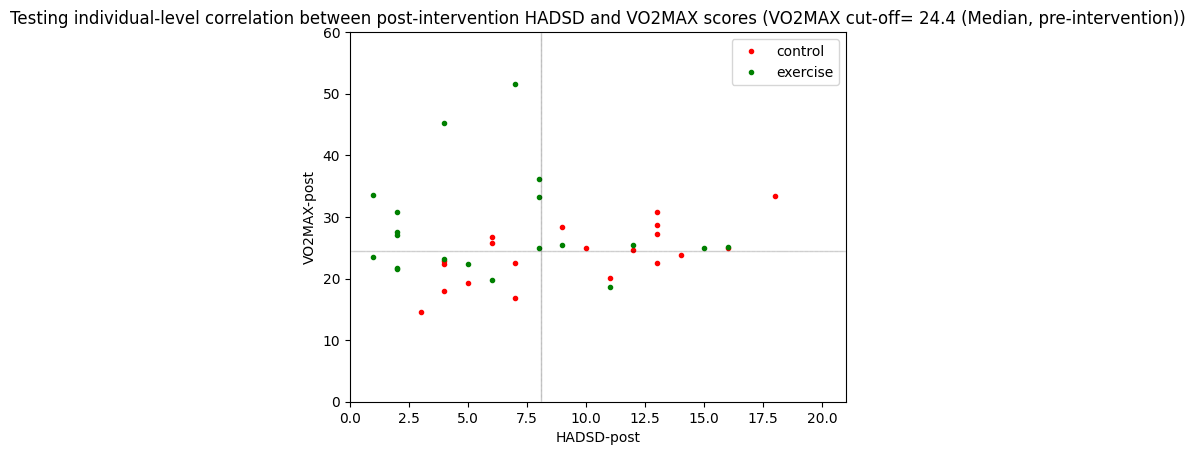

In [ ]:
# Scatter plotting Comparing individual's POST Scores: Depression assay 'HADSD2' vs. physiological 'VO2MAX2'
# VO2MAX Cut-off value = 24
# Testing for possible interaction

x11 = data[data['Group']=='control']['HADSD2']
y11 = data[data['Group']=='control']['VO2MAX2']

x12 = data[data['Group']=='exercise']['HADSD2']
y12 = data[data['Group']=='exercise']['VO2MAX2']

fig2 = plt.figure()
ax2 = fig2.gca()
ax2.plot(x11, y11, '.r', x12, y12, '.g')
# adding the faint-gray-cross for quartiles orientation

x13 = np.linspace(8.1,8.1,300)
y13 = np.linspace(0,60,300)

x14 = np.linspace(0,21,300)
y14 = np.linspace(data['VO2MAX'].median(),data['VO2MAX'].median(),300)
ax2.plot(x13, y13, '|k',x14, y14, '_k', alpha = 0.04)

# ax.plot(x3, y3, '_b')
# ax.plot(x2, y2, '.b', lw=5)
# ax.plot(x3, y3, '.g', lw=5)

ax2.set_xlim(0,21)
ax2.set_ylim(0,60)

ax2.set_title('Testing individual-level correlation between post-intervention HADSD and VO2MAX scores (VO2MAX cut-off= 24.4 (Median, pre-intervention))')
ax2.set_xlabel('HADSD-post')
ax2.set_ylabel('VO2MAX-post')

plt.legend(['control','exercise'])
fig2.show()



In [ ]:
data['VO2MAX'].median()

24.4

In [ ]:
# Counting the number of control and exercise dots in the upper scatter plot, this time done only with the post-intervetion HADSD and VO2MAX;
# VO2MAX2_cutoff = 24
# UNLIKE done in the other ratio approach, here I am the one detrmining assays'cut-off values' (more biased...)

control_post_HADSD2_VO2MAX = list(zip(x11.round(2),y11.round(2)))
exercise_post_HADSD_VO2MAX = list(zip(x12.round(2),y12.round(2)))

HADSD2_cutoff = 8.1
VO2MAX2_cutoff = data['VO2MAX'].median()

cont_post_q_distrib = determine_quartile(control_post_HADSD2_VO2MAX,HADSD2_cutoff,VO2MAX2_cutoff)
exer_post_q_distrib = determine_quartile(exercise_post_HADSD_VO2MAX,HADSD2_cutoff,VO2MAX2_cutoff)
print(f'The number of dots per xlow_ylow, xlow_yhigh, xhigh_yhigh, xhigh_ylow quartiles are:\nFor control HADSD-post, VO2MAX-post: \
{cont_post_q_distrib}\nFor exercise HADSD-post, VO2MAX-post: {exer_post_q_distrib}')

The number of dots per xlow_ylow, xlow_yhigh, xhigh_yhigh, xhigh_ylow quartiles are:
For control HADSD-post, VO2MAX-post: (7, 2, 8, 3)
For exercise HADSD-post, VO2MAX-post: (6, 9, 4, 1)


In [ ]:
# Scatter plotting Comparing individual's POST Scores: Depression assay 'HADSD2' vs. physiological 'VO2MAX2'
# # VO2MAX Cut-off value = 35
# Testing for possible interaction

# x11 = data[data['Group']=='control']['HADSD2']
# y11 = data[data['Group']=='control']['VO2MAX2']

# x12 = data[data['Group']=='exercise']['HADSD2']
# y12 = data[data['Group']=='exercise']['VO2MAX2']

# fig2 = plt.figure()
# ax2 = fig2.gca()
# ax2.plot(x11, y11, '.r', x12, y12, '.g')
# # adding the faint-gray-cross for quartiles orientation

# x13 = np.linspace(8.1,8.1,300)
# y13 = np.linspace(0,60,300)

# x14 = np.linspace(0,21,300)
# y14 = np.linspace(35,35,300)
# ax2.plot(x13, y13, '|k',x14, y14, '_k', alpha = 0.04)

# # ax.plot(x3, y3, '_b')
# # ax.plot(x2, y2, '.b', lw=5)
# # ax.plot(x3, y3, '.g', lw=5)

# ax2.set_xlim(0,21)
# ax2.set_ylim(0,60)

# ax2.set_title('Testing individual-level correlation between post-intervention HADSD and VO2MAX scores (VO2MAX cut-off= 35)')
# ax2.set_xlabel('HADSD-post')
# ax2.set_ylabel('VO2MAX-post')

# plt.legend(['control','exercise'])
# fig2.show()



In [ ]:
# Counting the number of control and exercise dots in the upper scatter plot, this time done only with the post-intervetion HADSD and VO2MAX;
# VO2MAX2_cutoff = 35
# UNLIKE done in the other ratio approach, here I am the one detrmining assays'cut-off values' (more biased...)

# control_post_HADSD2_VO2MAX = list(zip(x11.round(2),y11.round(2)))
# exercise_post_HADSD_VO2MAX = list(zip(x12.round(2),y12.round(2)))

# HADSD2_cutoff = 8.1
# VO2MAX2_cutoff = 35

# cont_post_q_distrib = determine_quartile(control_post_HADSD2_VO2MAX,HADSD2_cutoff,VO2MAX2_cutoff)
# exer_post_q_distrib = determine_quartile(exercise_post_HADSD_VO2MAX,HADSD2_cutoff,VO2MAX2_cutoff)
# print(f'The number of dots per xlow_ylow, xlow_yhigh, xhigh_yhigh, xhigh_ylow quartiles are:\nFor control HADSD-post, VO2MAX-post: \
# {cont_post_q_distrib}\nFor exercise HADSD-post, VO2MAX-post: {exer_post_q_distrib}')

In [ ]:
sum(cont_post_q_distrib), sum(exer_post_q_distrib)

(20, 20)

In [ ]:
# based on the post-intervention assays:
# Calculate probability to get improved HADSD depression score following control activity:
prob_better_HADSD_control = cont_post_q_distrib[1]/sum(cont_post_q_distrib)

# Calculate probability to get improved HADSD depression score following physical exercise activity:
prob_better_HADSD_exercise = exer_post_q_distrib[1]/sum(exer_post_q_distrib)
print(prob_better_HADSD_control,prob_better_HADSD_exercise)
print(f"There is {prob_better_HADSD_exercise/prob_better_HADSD_control}-fold higher probability for getting improved Depression-score following continuous physical exercise\
 (compared to impact of non-exercise activity).")

0.1 0.45
There is 4.5-fold higher probability for getting improved Depression-score following continuous physical exercise (compared to impact of non-exercise activity).


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Scatter plotting individuals significant mental ('r: HADSD2/HADSD') and physiological features ('r: VO2MAX2/VO2MAX')
# # Testing for possible interaction

# x1 = data[data['Group'] == 'control']['r: HADSD2/HADSD']
# y1 = data[data['Group'] == 'control']['r: VO2MAX2/VO2MAX']

# x2 = data[data['Group'] == 'exercise']['r: HADSD2/HADSD']
# y2 = data[data['Group'] == 'exercise']['r: VO2MAX2/VO2MAX']

# fig = plt.figure()
# ax = fig.gca()
# ax.plot(x1, y1, '.r', x2, y2, '.g')

# # Plotting lines y=1 and x=1
# x_line = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
# y_line = np.ones_like(x_line)
# ax.plot(x_line, y_line, 'k--', linewidth=0.5, alpha=0.5)

# y_line = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100)
# x_line = np.ones_like(y_line)
# ax.plot(x_line, y_line, 'k--', linewidth=0.5, alpha=0.5)

# # ax.plot(x2, y2, '.b', lw=5)
# # ax.plot(x3, y3, '.g', lw=5)

# # ax.set_xlim(0, 8)
# # ax.set_ylim(0, 5)

# ax.set_title('Testing individual-level correlation between ratios of VO2MAX and HADSD scores')
# ax.set_xlabel('[HADSD-post/HADSD-pre], ratio')
# ax.set_ylabel('[VO2MAX-post/VO2MAX-pre], ratio')

# plt.legend(['control', 'exercise'])
# plt.show()


In [ ]:
# ax.get_ylim()

In [ ]:
# Testing the significance of a pearson correlation co-efficient between the below data-sets

# scipy.stats.pearsonr(data['r: HADSD2/HADSD'],data['r: VO2MAX2/VO2MAX'])
# scipy.stats.pearsonr(data[data['Group']=='exercise']['r: HADSD2/HADSD'],data[data['Group']=='exercise']['r: VO2MAX2/VO2MAX'])

In [ ]:
# fig = plt.figure()
# ax1 = fig.gca()
# ax1.boxplot([data[data['Group']=='control']['r: HADSD2/HADSD'],data[data['Group']=='exercise']['r: HADSD2/HADSD'],
#              data[data['Group']=='control']['r: HADSA2/HADSA'],data[data['Group']=='exercise']['r: HADSA2/HADSA']],
#            labels=['Control', 'Exercise','Control', 'Exercise'],
#            sym='rs', vert=False, showmeans=False,
#           #  colors = ['b','b','r','r'],
#            meanline=True, showcaps=True, notch=False)
# ax1.set_title('Improved HADSD depression score following Physical exercise(?)')
# ax1.set_xlabel('x-label, ratio')
# # ax1.set_ylabel('y-label')
# # ax1.set_xlim(0,1.25)

# # ax2 = fig.add_subplot(3,1,2)
# # ax2.boxplot([data[data['Group']=='control']['r: HADSA2/HADSA'],data[data['Group']=='exercise']['r: HADSA2/HADSA']],
# #            labels=['Control', 'Exercise'],
# #            sym='rs', vert=False, showmeans=False,
# #            meanline=True, showcaps=True, notch=False)
# # ax2.set_title('HADSA anxiety score following Physical exercise')
# # ax2.set_xlabel('[HADSA-Post/HADSA-Pre], Ratio')
# # # ax1.set_ylabel('y-label')
# # ax2.set_xlim(0,1.3)

# # ax3 = fig.add_subplot(3,1,3)
# # ax3.boxplot([data[data['Group']=='control']['r: VO2MAX2/VO2MAX'],data[data['Group']=='exercise']['r: VO2MAX2/VO2MAX']],
# #            labels=['Control', 'Exercise'],
# #            sym='rs', vert=False, showmeans=False,
# #            meanline=True, showcaps=True, notch=False)
# # ax3.set_title('Maximal lung-oxygen value increased following Physical exercise(?)')
# # ax3.set_xlabel('[VO2MAX-Post/VO2MAX-Pre], Ratio')
# # # ax1.set_ylabel('y-label')
# # ax3.set_xlim(0.5,1.3)

# fig.tight_layout(pad=0.8)
# plt.show()

In [ ]:
# data.groupby('Group')[str(numeric_headers[1]+'2')].plot(kind = 'hist', alpha = 0.4, bins = 5, legend = True)
# data.groupby('Group')[str(numeric_headers[1])+'2'].hist(legend = True, bins = 5, alpha = 0.4)

In [ ]:
# data.groupby('Group')['ratio: HADSA2/HADSA'].hist(alpha = 0.4, bins = 5, legend = True)
# data.columns

In [ ]:
# data.groupby('Group')['ratio: HADSD2/HADSD'].hist(alpha = 0.4, bins = 5, legend = True)
# data.groupby('Group')['ratio: HADSD2/HADSD'].std().round(2)

In [ ]:
# # subploting scores of all physiological ratios: after/before intervention, per individual, groups comparison
# data['ratio: BMI2/BMI'] = data['BMI2']/data['BMI']
# data['ratio: Weight2/Weight'] = data['Weight2']/data['Weight']
# data['ratio: VO2MAX2/VO2MAX'] = data['VO2MAX2']/data['VO2MAX']

In [ ]:
# data.groupby('Group')['ratio: BMI2/BMI'].hist(alpha = 0.4, bins = 5, legend = True)

In [ ]:
# data.groupby('Group')['ratio: Weight2/Weight'].hist(alpha = 0.4, bins = 5, legend = True)

In [ ]:
# data.groupby('Group')['ratio: VO2MAX2/VO2MAX'].hist(alpha = 0.4, bins = 5, legend = True)